# Project: Investigate a Dataset - [Socail Network Ads]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data wrangling</a></li>
<li><a href="#Exploratory">Data Exploratory</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

#### Some Question we nned to ask it

1. Is it relationship between Age and EstimatedSalary
1. Is it relationship between Age and Purchased
1. Is it relationship between Age and Gender and Purchased
1. Is it between EstimatedSalary and Gender and Purchased

## Introduction

#### Import some library used in project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix , accuracy_score
import warnings
warnings.filterwarnings('ignore')


## Data Wrangling


#### Read data

In [2]:
df =pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [5]:
df.tail(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.shape

(400, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
df[df['EstimatedSalary']==19000]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
66,15679760,Male,24,19000,0


In [12]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Data Exploratory

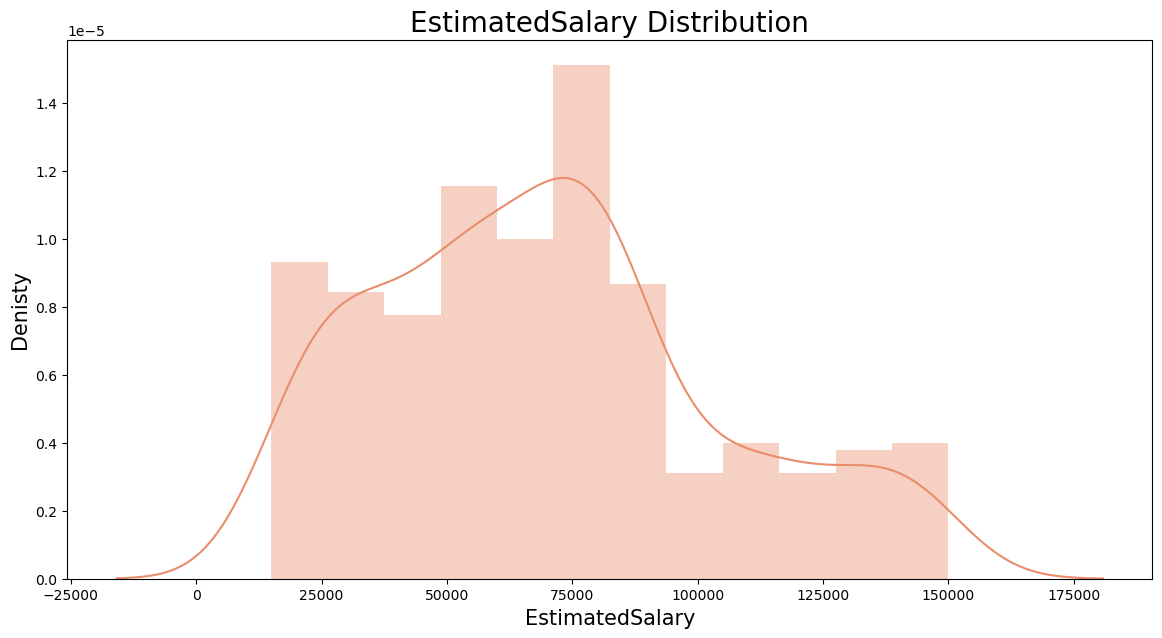

In [13]:
plt.figure(figsize=(14,7))
sns.set_palette("flare")
sns.distplot(df.EstimatedSalary)
plt.xlabel("EstimatedSalary",fontdict={'fontsize':15})
plt.ylabel("Denisty",fontdict={'fontsize':15})
plt.title("EstimatedSalary Distribution",fontdict={'fontsize':20});

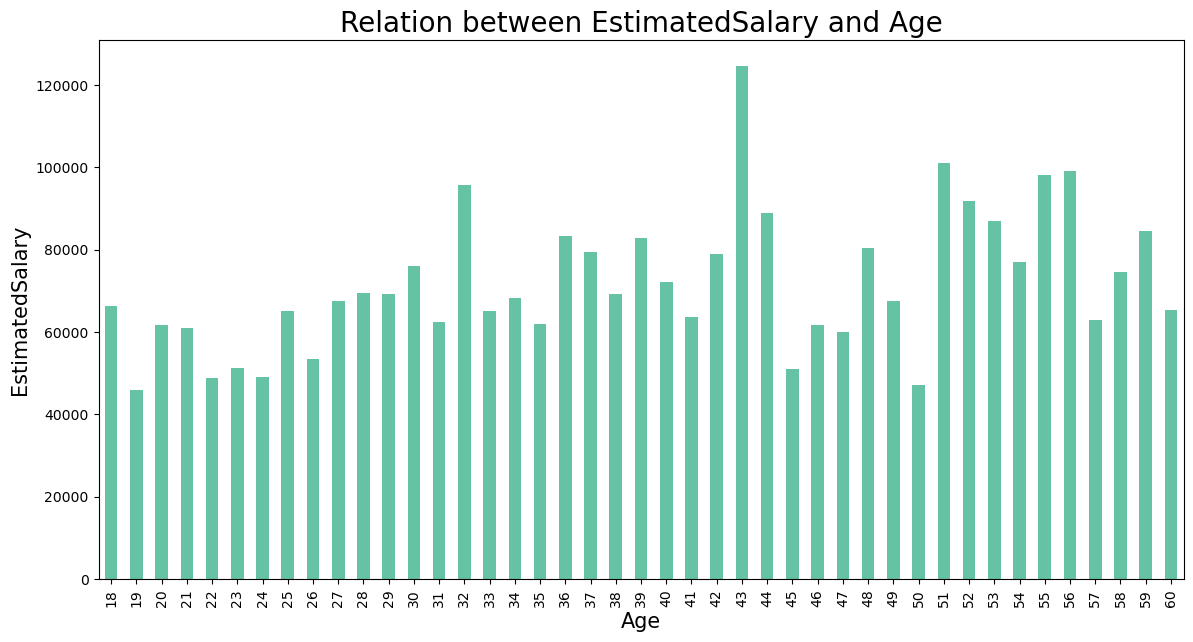

In [14]:
plt.figure(figsize=(14,7))
sns.set_palette("Set2")
df.groupby('Age')['EstimatedSalary'].mean().plot(kind='bar')
plt.ylabel("EstimatedSalary",fontdict={'fontsize':15})
plt.xlabel("Age",fontdict={'fontsize':15})
plt.title("Relation between EstimatedSalary and Age",fontdict={'fontsize':20});

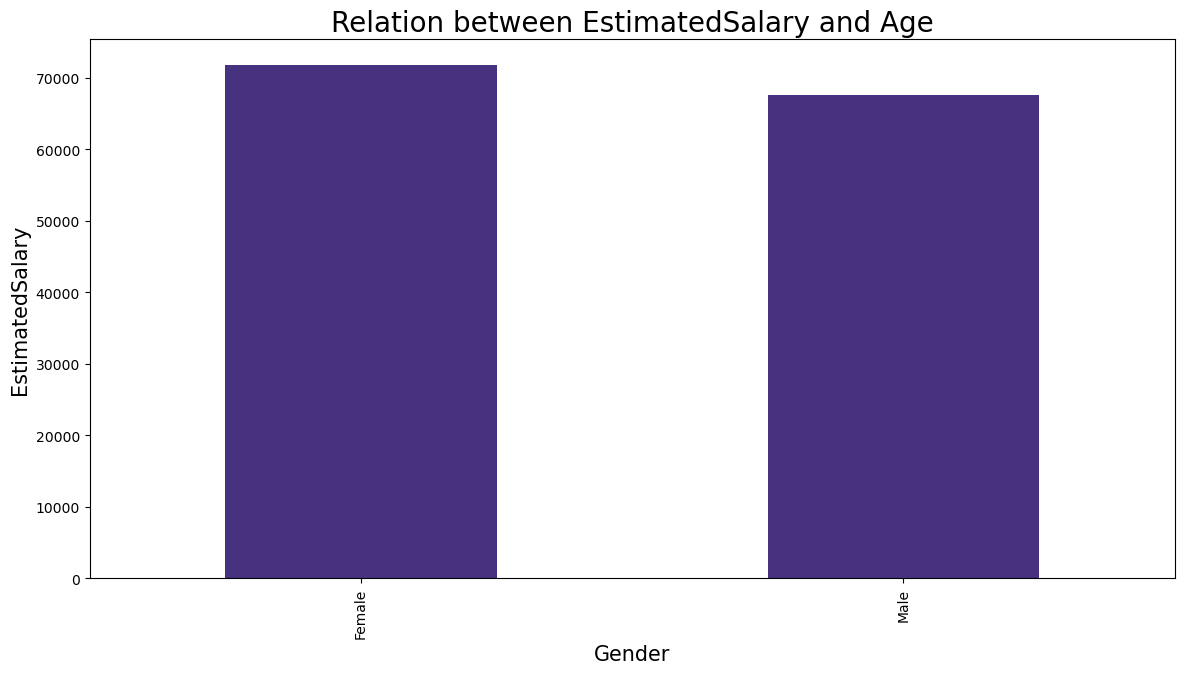

In [15]:
plt.figure(figsize=(14,7))
sns.set_palette('viridis')
df.groupby('Gender')['EstimatedSalary'].mean().plot(kind='bar')
plt.ylabel("EstimatedSalary",fontdict={'fontsize':15})
plt.xlabel("Gender",fontdict={'fontsize':15})
plt.title("Relation between EstimatedSalary and Age",fontdict={'fontsize':20});

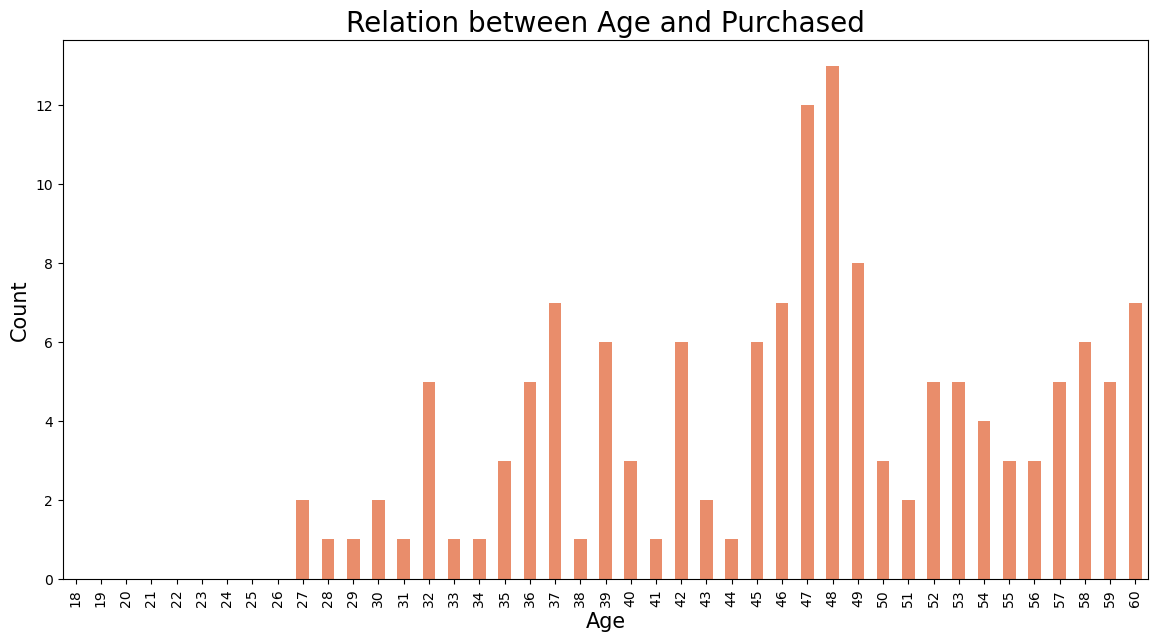

In [16]:
plt.figure(figsize=(14,7))
sns.set_palette("flare")
df.groupby('Age')["Purchased"].sum().plot(kind='bar')
plt.xlabel("Age",fontdict={'fontsize':15})
plt.ylabel("Count",fontdict={'fontsize':15})
plt.title("Relation between Age and Purchased",fontdict={'fontsize':20});

- In each age what is age have more Purchased? in resently graph we see in age [47,48] have a more Purchased.

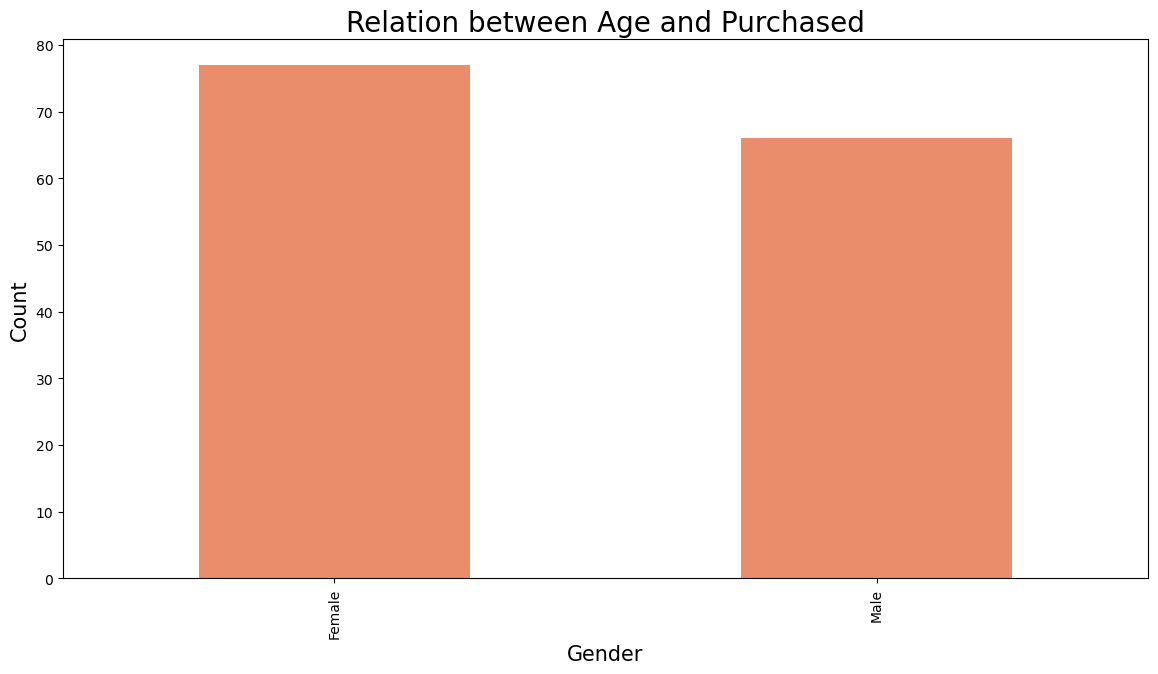

In [17]:
plt.figure(figsize=(14,7))
sns.set_palette("flare")
df.groupby('Gender')["Purchased"].sum().plot(kind='bar')
plt.xlabel("Gender",fontdict={'fontsize':15})
plt.ylabel("Count",fontdict={'fontsize':15})
plt.title("Relation between Age and Purchased",fontdict={'fontsize':20});

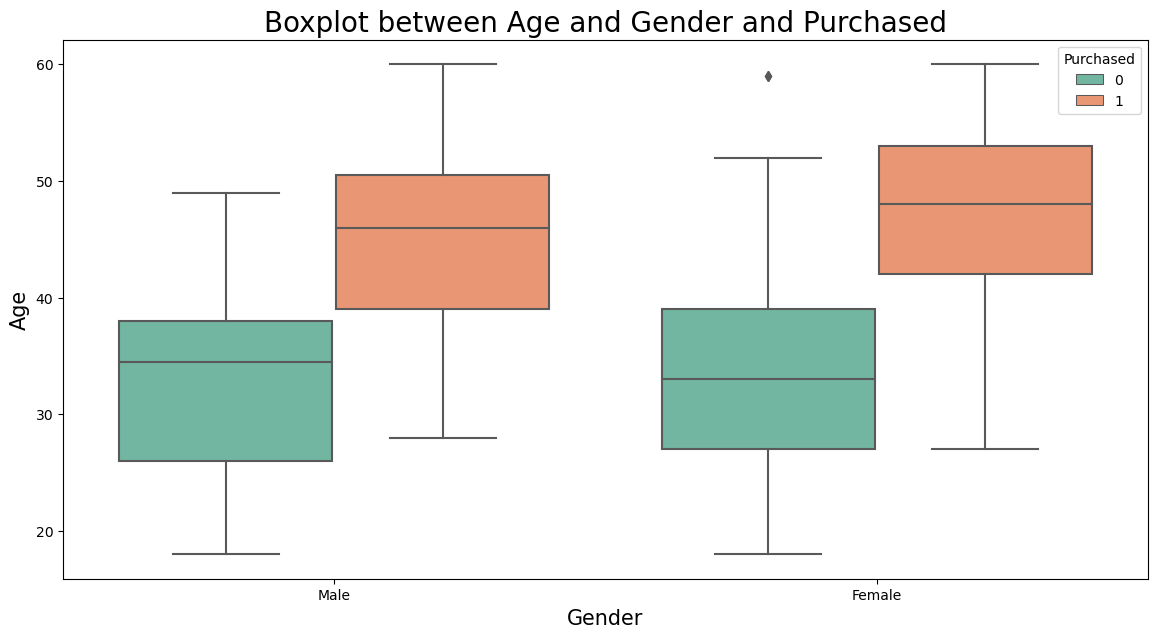

In [18]:
plt.figure(figsize=(14,7))
sns.set_palette("Set2")
sns.boxplot(y='Age', x='Gender',data=df,hue='Purchased')
plt.xlabel("Gender",fontdict={'fontsize':15})
plt.ylabel("Age",fontdict={'fontsize':15})
plt.title("Boxplot between Age and Gender and Purchased",fontdict={'fontsize':20});

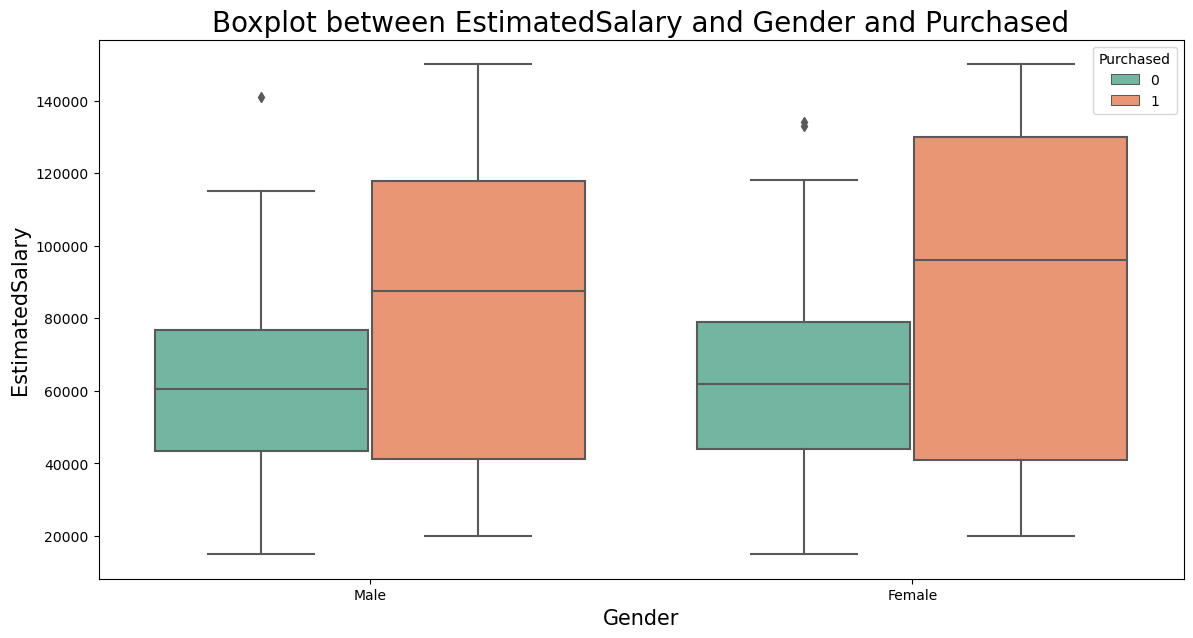

In [19]:
plt.figure(figsize=(14,7))
sns.set_palette("Set2")
sns.boxplot(y='EstimatedSalary', x='Gender',data=df,hue='Purchased')
plt.xlabel("Gender",fontdict={'fontsize':15})
plt.ylabel("EstimatedSalary",fontdict={'fontsize':15})
plt.title("Boxplot between EstimatedSalary and Gender and Purchased",fontdict={'fontsize':20});

- we notice in here that, mean of Salary and purchased of male higher then Female

### Check if we have out layer or not by using z_score test

In [20]:
from scipy import stats

In [21]:
z = np.abs(stats.zscore(df['Age']))
np.where(z>3)

(array([], dtype=int64),)

In [22]:
z = np.abs(stats.zscore(df['EstimatedSalary']))
np.where(z>3)

(array([], dtype=int64),)

In [23]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [24]:
df_1 = df.drop(['User ID','Age','EstimatedSalary'],axis=1)

In [25]:
df_1.Gender = df_1.Gender.map({'Male': 1, 'Female':0})

In [26]:
df_1

,Gender,Purchased
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
395,0,1
396,1,1
397,0,1
398,1,0


In [27]:
P_F = df.Purchased.mean()
P_F

0.3575

In [28]:
P_M =df.Purchased.mean()
P_M

0.3575

In [29]:
N_F = df.Gender.value_counts()[0]
N_F

204

In [30]:
N_M = df.Gender.value_counts()[1]
N_M

196

In [31]:
FemalePurchesed = np.random.choice(2,size=N_F,p=[P_F,1-P_M])
FemalePurchesed.mean()

0.6715686274509803

In [32]:
malePurchesed = np.random.choice(2,size=N_M,p=[P_M,1-P_F])
malePurchesed.mean()

0.673469387755102

In [33]:
FemalePurchesed.mean() - malePurchesed.mean()

-0.0019007603041216736

In [34]:
p_diffs, bs_F_means, bs_M_means = [], [], []
for _ in range (10000):
    bs_F = np.random.choice(2, size=N_F ,p=[P_F,1 - P_F])
    bs_M = np.random.choice(2, size=N_M ,p=[P_M,1 - P_M])
    bs_F_means.append(bs_F.mean())
    bs_M_means.append(bs_M.mean())
    p_diffs.append(bs_F.mean() - bs_M.mean())

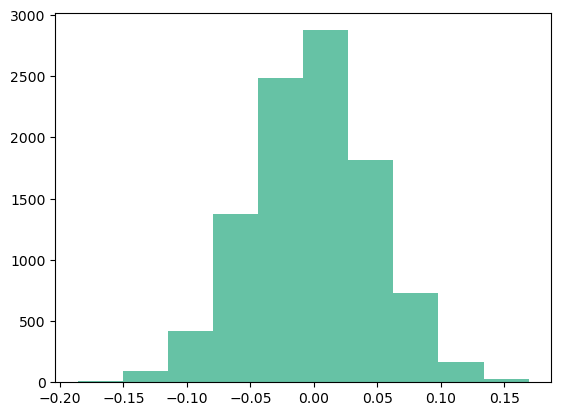

In [35]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

In [36]:
p_diffs

array([-0.0280112 ,  0.02931172,  0.00730292, ...,  0.12835134,
        0.01320528,  0.00260104])

In [37]:
actual_diff = df_1.query('Gender == 0').Purchased.mean() -  df_1.query('Gender == 1').Purchased.mean()

In [38]:
actual_diff

0.04071628651460585

In [39]:
(p_diffs >actual_diff).mean()

0.1838

In [40]:
Target =df.Purchased

In [41]:
df_new = df.drop(['Purchased','User ID'],axis='columns')

In [42]:
df_new

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [43]:
df_new.Gender = df_new.Gender.map({'Male': 1, 'Female':0})

In [44]:
df_new

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [45]:
X_train , X_test , Y_train ,Y_test =train_test_split(df_new,Target,random_state=42,test_size=0.2)

In [46]:
Model= GaussianNB()

In [47]:
Model.fit(X_train,Y_train)

GaussianNB()

In [48]:
Model.score(X_test,Y_test)

0.9375

In [49]:
Y_pred = Model.predict(X_test)

In [50]:
Y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [51]:
Y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [52]:
Cross_Validation_Score = cross_val_score(Model,X_train,Y_train,cv=5)

In [53]:
Cross_Validation_Score.mean()

0.8625

In [54]:
accuracy_score(Y_test,Y_pred)

0.9375

In [55]:
confusion_matrix(Y_test,Y_pred)

array([[50,  2],
       [ 3, 25]], dtype=int64)

### Hypo Test
we assume that null Hypo 

In [56]:
zscore(df_new)

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


In [57]:
from scipy.stats import norm
import statsmodels.api as sm

In [58]:
norm.cdf(zscore(df_new))

array([[0.84618415, 0.03739114, 0.06810604],
       [0.84618415, 0.39990718, 0.07205145],
       [0.16349467, 0.13281009, 0.21614187],
       ...,
       [0.16349467, 0.88082273, 0.07205145],
       [0.84618415, 0.43719915, 0.14030763],
       [0.16349467, 0.86072812, 0.16088096]])

In [59]:
MaleBuy= df_1.query('Gender == 1 & Purchased == 1').count()[0]
FemaleBuy= df_1.query('Gender == 0 & Purchased == 1').count()[0]
n_gende_buy=df_1.Gender.value_counts()[1]
n_gender_notbuy=df_1.Gender.value_counts()[0]

In [60]:
MaleBuy,FemaleBuy,n_gender_notbuy,n_gende_buy

(66, 77, 204, 196)

In [61]:
z_score ,p_value= sm.stats.proportions_ztest([FemaleBuy,MaleBuy],[n_gender_notbuy,n_gende_buy])

In [62]:
z_score,p_value

(0.8493891252901871, 0.3956648022875956)

In [63]:
from scipy.stats import norm

In [64]:
norm.cdf(z_score)

0.8021675988562023

In [65]:
df.groupby('Gender')['Purchased'].sum()

Gender
Female    77
Male      66
Name: Purchased, dtype: int64

In [66]:
df_1.groupby('Gender')['Purchased'].mean()

Gender
0    0.377451
1    0.336735
Name: Purchased, dtype: float64

In [67]:
norm.ppf(1-(0.05))

1.6448536269514722

## Conclusions

##### At a certain point in life, at the age of 43, the Estimated Salary in high level of it, then it decrease again, we can although this is peaple have a highest Estimated salary they have low Purchased, but after some year they have a huge Purchased, i expect this peaple after earn a good salary in specific age and after that spend money profusely.